# 駅データから取得したデータの分析

---
[駅データ.jp](http://www.ekidata.jp/)  


## データ取得

In [25]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import japanize_matplotlib
import networkx as nx

In [2]:
base_file_path = "./data/ekidata/"
file_name_station = "station20210312free.csv"
file_name_line = "line20210312free.csv"
file_name_join = "join20210312.csv"
file_name_company = "company20200619.csv"

file_name_pref_cd = "pref_cd.csv"

In [3]:
station_df = pd.read_csv(base_file_path + file_name_station)
line_df = pd.read_csv(base_file_path + file_name_line)
join_df = pd.read_csv(base_file_path + file_name_join)
company_df = pd.read_csv(base_file_path + file_name_company)

pref_cd_df = pd.read_csv(base_file_path + file_name_pref_cd, encoding="sjis")

## データ確認
- station_dfから確認していく

In [4]:
display(station_df.head(3))
#display(line_df.head(3))
#display(join_df.head(3))
#display(company_df.head(3))

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort
0,1110101,1110101,函館,NaN,NaN,11101,1,040-0063,北海道函館市若松町１２-１３,140.726413,41.773709,1902-12-10,0000-00-00,0,1110101
1,1110102,1110102,五稜郭,NaN,NaN,11101,1,041-0813,函館市亀田本町,140.733539,41.803557,0000-00-00,0000-00-00,0,1110102
2,1110103,1110103,桔梗,NaN,NaN,11101,1,041-0801,北海道函館市桔梗３丁目４１-３６,140.722952,41.846457,1902-12-10,0000-00-00,0,1110103


In [5]:
# 行数確認
print(station_df.shape)

(10865, 15)


In [58]:
# pref_cd = 県名っぽい
#len(station_df["pref_cd"].unique())

47

In [6]:
# close_ymdカラムについて
# これは廃線駅か,,,
station_df[station_df["close_ymd"] != "0000-00-00"]

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort
11,1110112,1110112,東山,NaN,NaN,11101,1,049-2141,茅部郡森町字駒ケ岳,140.605222,42.061720,1943-02-26,2017-03-04,2,1110112
12,1110113,1110113,姫川,NaN,NaN,11101,1,049-2306,茅部郡森町字姫川,140.591632,42.081312,1951-05-19,2017-03-04,2,1110113
23,1110124,1110124,桂川,NaN,NaN,11101,1,049-2321,茅部郡森町字鷲ノ木町,140.542788,42.115600,1944-09-30,2017-03-04,2,1110124
31,1110132,1110132,鷲ノ巣,NaN,NaN,11101,1,049-3122,二海郡八雲町花浦,140.269919,42.278389,1987-04-01,2016-03-26,2,1110132
34,1110135,1110135,北豊津,NaN,NaN,11101,1,049-3464,山越郡長万部町字豊津,140.297868,42.400969,1944-07-01,2017-03-04,2,1110135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,1140926,1140926,ヤナバスキー場前,NaN,NaN,11409,20,398-0001,大町市大字平,137.855039,36.605851,1985-12-24,2019-03-16,2,1140926
2998,1151210,1151210,池の浦シーサイド,NaN,NaN,11512,24,519-0601,伊勢市二見町松下,136.813691,34.491358,1989-07-16,2020-03-14,2,1151210
8565,9941617,9941617,中鶴来,NaN,NaN,99416,17,920-2134,石川県白山市鶴来水戸町,136.624412,36.446407,1927-12-28,2009-11-01,2,9941617
8566,9941618,9941618,加賀一の宮,NaN,NaN,99416,17,920-2115,石川県白山市白山町,136.632878,36.437691,1927-06-12,2009-11-01,2,9941618


In [7]:
# 都道府県抽出用の正規表現
#pattern = '東京都|北海道|(京都|大阪)府|.{2,3}県'

#station_df["kenmei"] = station_df["address"].apply(lambda x:re.match(pattern,x)[0] if re.match(pattern,x) != None else "miss")

# 殆ど県名含まれてないから取得できてない....
#print(len(station_df[station_df["kenmei"] == "miss"]))
#station_df_ken = station_df[station_df["kenmei"] !="miss"]
#print(station_df_ken.shape)


# pref_cdが都道府県を示しているようなのでそちらを利用する
station_df = pd.merge(station_df, pref_cd_df)

In [8]:
station_df.groupby("kenmei").count()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort
kenmei,,,,,,,,,,,,,,,
三重県,273,273,273,0,0,273,273,273,273,273,273,273,273,273,273
京都府,271,271,271,0,0,271,271,271,271,271,271,271,271,271,271
佐賀県,94,94,94,0,0,94,94,94,94,94,94,94,94,94,94
兵庫県,428,428,428,0,0,428,428,428,428,428,428,428,428,428,428
北海道,650,650,650,0,0,650,650,650,650,650,650,650,650,650,650
千葉県,393,393,393,0,0,393,393,393,393,393,393,393,393,393,393
和歌山県,132,132,132,0,0,132,132,132,132,132,132,132,132,132,132
埼玉県,273,273,273,0,0,273,273,273,273,273,273,273,273,273,273
大分県,91,91,91,0,0,91,91,91,91,91,91,91,91,91,91


## 緯度、経度のデータを可視化してみる

C:\Users\ren\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


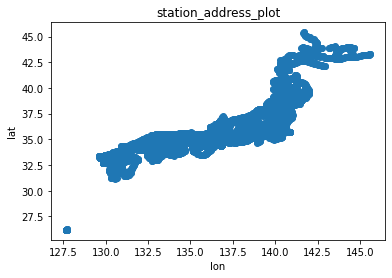

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(station_df["lon"],station_df["lat"])

ax.set_title('station_address_plot')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

fig.show()

- 当たり前だが日本地図っぽい見た目になった

## 県ごとの廃線駅を調べてみる

In [10]:
close_station_df = station_df[station_df["close_ymd"] != "0000-00-00"]
print(close_station_df.shape)

# to_datetime
close_station_df["close_ymd"] = pd.to_datetime(close_station_df["close_ymd"])


(132, 16)


C:\Users\ren\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
close_station_df.groupby("kenmei").count()["station_cd"]

kenmei
三重県     1
北海道    83
大阪府     1
宮城県    19
岩手県    20
新潟県     1
石川県     2
福島県     2
長野県     1
青森県     2
Name: station_cd, dtype: int64

- 少なくとも使用しているデータでは大多数が北海道の廃線駅で占められているようだ

In [103]:
#close_station_df["y"] = close_station_df["close_ymd"].apply(lambda x : x[0:4])
#plt.hist(close_station_df["y"])

C:\Users\ren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
# 年カラム作成してソート
close_station_df["y"] = close_station_df["close_ymd"].dt.strftime("%Y")
close_station_df = close_station_df.sort_values("y")

(array([ 3.,  1.,  1., 21.,  1., 19., 10.,  1.,  9., 66.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

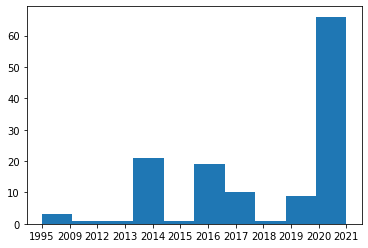

In [160]:
plt.hist(close_station_df["y"])

- これは最近のデータだけ使用しているから廃線がここ2年に偏ってるのかな...?

In [17]:
company_df

,company_cd,rr_cd,company_name,company_name_k,company_name_h,company_name_r,company_url,company_type,e_status,e_sort
0,1,11,JR北海道,ジェイアールホッカイドウ,北海道旅客鉄道株式会社,JR北海道,http://www.jrhokkaido.co.jp/,1,0,1
1,2,11,JR東日本,ジェイアールヒガシニホン,東日本旅客鉄道株式会社,JR東日本,http://www.jreast.co.jp/,1,0,2
2,3,11,JR東海,ジェイアールトウカイ,東海旅客鉄道株式会社,JR東海,http://jr-central.co.jp/,1,0,3
3,4,11,JR西日本,ジェイアールニシニホン,西日本旅客鉄道株式会社,JR西日本,http://www.westjr.co.jp/,1,0,4
4,5,11,JR四国,ジェイアールシコク,四国旅客鉄道株式会社,JR四国,http://www.jr-shikoku.co.jp/,1,0,5
...,...,...,...,...,...,...,...,...,...,...
166,239,99,くま川鉄道,クマガワテツドウ,くま川鉄道株式会社,くま川鉄道,http://www.kumagawa-rail.com/,0,0,237
167,240,99,肥薩おれんじ鉄道,ヒサツオレンジテツドウ,肥薩おれんじ鉄道株式会社,肥薩おれんじ鉄道,http://www.hs-orange.com/,0,0,238
168,241,99,熊本市交通局,クマモトシコウツウキョク,熊本市交通局,熊本市交通局,http://www.kotsu-kumamoto.jp/,0,0,239
169,242,99,鹿児島市交通局,カゴシマコウツウキョク,鹿児島市交通局,鹿児島市交通局,http://www.kotsu-city-kagoshima.jp/,0,0,240


In [18]:
station_df

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,lat,open_ymd,close_ymd,e_status,e_sort,kenmei
0,1110101,1110101,函館,NaN,NaN,11101,1,040-0063,北海道函館市若松町１２-１３,140.726413,41.773709,1902-12-10,0000-00-00,0,1110101,北海道
1,1110102,1110102,五稜郭,NaN,NaN,11101,1,041-0813,函館市亀田本町,140.733539,41.803557,0000-00-00,0000-00-00,0,1110102,北海道
2,1110103,1110103,桔梗,NaN,NaN,11101,1,041-0801,北海道函館市桔梗３丁目４１-３６,140.722952,41.846457,1902-12-10,0000-00-00,0,1110103,北海道
3,1110104,1110104,大中山,NaN,NaN,11101,1,041-1121,亀田郡七飯町大字大中山,140.713580,41.864641,0000-00-00,0000-00-00,0,1110104,北海道
4,1110105,1110105,七飯,NaN,NaN,11101,1,041-1111,亀田郡七飯町字本町,140.688556,41.886971,0000-00-00,0000-00-00,0,1110105,北海道
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,9992715,9992715,首里,NaN,NaN,99927,47,903-0806,那覇市首里汀良町３-１９,127.725492,26.219191,0000-00-00,0000-00-00,0,9992715,沖縄県
10861,9992716,9992716,石嶺,NaN,NaN,99927,47,903-0804,沖縄県那覇市首里石嶺町二丁目90,127.729167,26.227222,2019-10-01,0000-00-00,0,9992716,沖縄県
10862,9992717,9992717,経塚,NaN,NaN,99927,47,901-2102,沖縄県浦添市前田,127.728333,26.236667,2019-10-01,0000-00-00,0,9992717,沖縄県
10863,9992718,9992718,浦添前田,NaN,NaN,99927,47,901-2102,沖縄県浦添市前田一丁目,127.732278,26.243889,2019-10-01,0000-00-00,0,9992718,沖縄県


## 駅の情報からネットワーク図を作成してみる

In [26]:
#全国の駅から東京メトロの駅のみ抽出する 東京メトロ...company_cd == 18
metro = station_df[["station_cd", "station_name", "line_cd", "lon", "lat"]]
metro = pd.merge(metro, line_df, on = 'line_cd')
metro = metro[metro["company_cd"] == 18]
metro = metro[["station_cd", "station_name", "line_cd", "lon_x", "lat_x", "line_name", "line_color_c", "line_color_t"]]
lon = metro["lon_x"]
lat = metro["lat_x"]
metro["lon"] = lon
metro["lat"] = lat
metro = metro[["station_cd", "station_name", "line_cd", "lon", "lat", "line_name"]]

#東京メトロの接続辺を抽出する 路線...line_cd == 28001---28010
metro_join = join_df[(join_df["line_cd"]==28001)|(join_df["line_cd"]==28002)|(join_df["line_cd"]==28003)
                     |(join_df["line_cd"]==28004)|(join_df["line_cd"]==28005)|(join_df["line_cd"]==28006)
                     |(join_df["line_cd"]==28007)|(join_df["line_cd"]==28008)|(join_df["line_cd"]==28009)
                     |(join_df["line_cd"]==28010)]
metro_join = metro_join[["station_cd1", "station_cd2"]]

C:\Users\ren\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AttributeError: module 'matplotlib.cbook' has no attribute 'is_numlike'

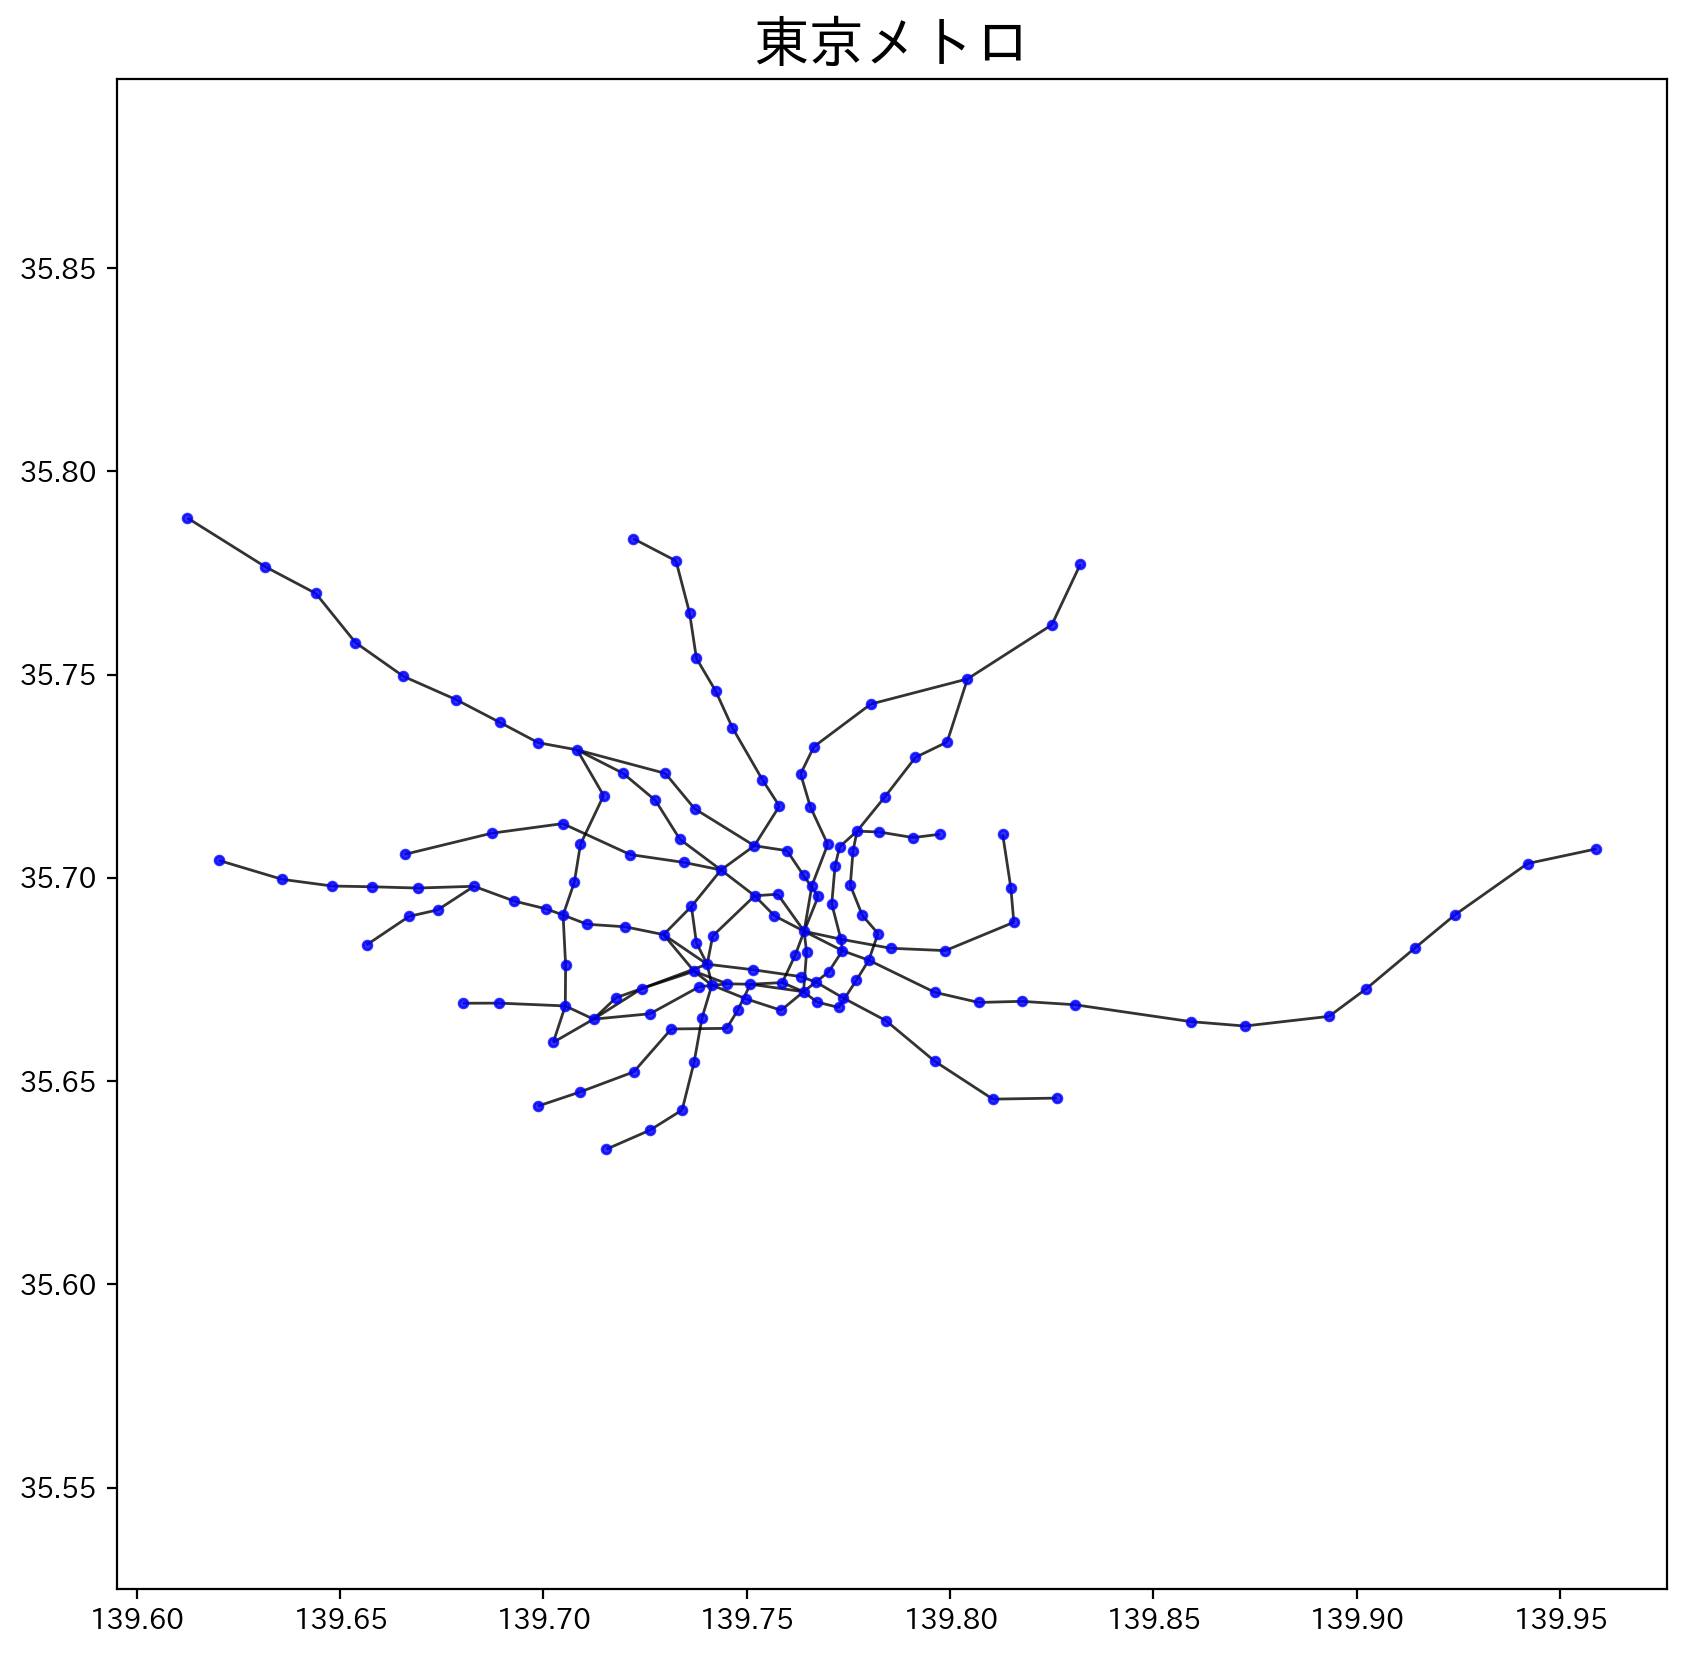

In [29]:
#グラフの宣言
G = nx.Graph()
#頂点を駅名にする
G.add_nodes_from(metro["station_name"])
#plotの座標を設定
pos={}

for i, j, k in zip(metro["station_name"], metro["lon"], metro["lat"]):
    pos[i] = (j, k)

#リストeにstation_nameとstation_cdを格納し、リンクさせる
e = []
for i, j in zip(metro["station_name"], metro["station_cd"]):
    e.append([i, j])

#グラフに辺情報を加える
for i, j in zip(metro_join["station_cd1"], metro_join["station_cd2"]):
    for k in e:
        if k[1] == i:
            for l in e:
                if l[1] == j:
                    G.add_edge(k[0], l[0])
#グラフの出力の設定
plt.figure(figsize=(10,10),dpi=200)
plt.title('東京メトロ', fontsize=20)
plt.axes().set_aspect('equal', 'datalim')
nx.draw_networkx(G, pos, node_color='b', alpha=0.8, node_size=10, font_size=5, font_family='IPAexGothic')
plt.show()